# Assignment XX: Bandits
---

In this assignment, we will be solving a sequential decision-making problem known as multi-armed bandit ([link](https://en.wikipedia.org/wiki/Multi-armed_bandit)).

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/Bandits/1.png")
"/>
</p>

<p align="center">
  <em>Figure 1: An example of multi-armed bandit.</em>
</p>

<br>

Let's start by importing necessary packages/libraries.

In [1]:
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt

We formulate our problem as an episodic task with each containing multiple timesteps. At each timestep, we take an action on one slot machine. The version of multi-armed bandit that we implement is known as `Bernoulli Bandits`, based on `Bernoulli experiments`. To be specific, each bandit behaves like a random variable with binary outcomes `"success"` or `"failure"`(corresponding to reward `1` or `0`).

Next, let's use the following code to implement the reward function at each timestep.


In [2]:
# Success probabilities of each arm and stochastic reward for each arm (1 = success, 0 = failure)
def timestep(probabilities, arm_to_pull):

  # Generate a random number between 0 and 1 with uniform probability
  rand_num = random.random()

  # If the random number is less than the true probability of payout of the arm that we decided to pull
  if rand_num <= probabilities[arm_to_pull]:
    reward = 1
  else:
    reward = 0

  return reward

Note that the above function has access to the `"true"` payout probabilities, which is unknown to the learning agent.

Next, we define `Agent` by keeping track of `Quality` values of each action. A quality value is an estimate of the expected reward of a slot machine. Initially, quality values are set to zero. Then, quality values are updated using the reward received after each timestep using the following equation:

  $$Quality~(a) ←  Quality~(a) + \frac{1}{\mathcal{N}_a}[Reward(a) - Quality~(a)],$$

where $\mathcal{N}_a = $ number of times this action has been taken so far (in an episode). Additionally, the agent uses $\epsilon$-greedy strategy to choose an action.




In [3]:
class Agent:
  def __init__(self, num_actions):
    self.num_actions = num_actions

    # In each experiment/ episode, keep a count of how many times each action was taken
    self.actions_track = np.zeros(num_actions, dtype=int)

    # Quality values at the start of an episode are initialized to zero
    self.quality_values = np.zeros(num_actions, dtype=float)

  def update_quality_value(self, action, reward):

    # Update the count of this action
    self.actions_track[action] += 1

    # Update the quality value of this action
    self.quality_values[action] += (1.0/self.actions_track[action]) * (reward - self.quality_values[action])

  def get_action(self, eps):
    # Epsilon-greedy policy
    if np.random.random() < eps: # explore
      return np.random.randint(self.num_actions)

    else:
    # Exploit the Q values collected by agent to get the best action
      return np.argmax(self.quality_values)

##Exercise 1.

Let's implement the __episode__ function, which
- takes the true payout probabilities (for reward calulation) and number of timesteps of an episode as input; and

- ouputs the actions taken at each timestep as well as the reward collected from each action.

Hints
  - You can use `agent.get_action()` to get an action.
  - Reward is obtained at each timestep by calling the __timestep__ function defined before.

In [4]:
# A single episode/ experiment
def episode(probs, steps_per_episode):

  agent = Agent(len(probs))  # initialize agent

  actions_per_episode= []
  rewards_per_episode = []

  for step in range(steps_per_episode):

    action = agent.get_action(eps=eps)
    reward = timestep(probs, action)

    # Update q value for the action, based on the reward
    agent.update_quality_value(action, reward)

    actions_per_episode.append(action)
    rewards_per_episode.append(reward)

  return np.array(actions_per_episode), np.array(rewards_per_episode)

Next, let's set some parameters.

In [5]:
# Settings, inits
# True payout probabilities/ unknowns
probs = [0.10, 0.50, 0.60, 0.80]
num_arms = len(probs)

# number of experiments to perform
max_episodes = 1000

# number of steps
steps_per_episode = 500

# probability of random exploration, change this value
eps = 0.1

# History of rewards and actions over all episodes
total_rewards = np.zeros((steps_per_episode,))
total_actions = np.zeros((steps_per_episode, num_arms))

print(f"Rewards to collect: {total_rewards.shape}\nActions to collect: {total_actions.shape}")

Rewards to collect: (500,)
Actions to collect: (500, 4)


- `total_rewards` keeps a track of rewards collected at each timestep over episodes.
- `total_actions` keeps a track of actions taken at each timestep over episodes.

##Exercise 2.

Please re-run the entire Colab with different `eps` values between 0 and 1, where

- `eps` = 0 means no exploration (full exploitation), i.e., always take the greedy action
- `eps` = 1 means full exploration i.e., always take a random action

What do you find?

Note that each episode is independent. So, the `knowledge` learned (e.g., quality values) over an episode is not transferable to following episodes.

Now, let's use the code below to run all episodes and collect the reward and action history.



In [6]:
for i in range(max_episodes):
  actions_episode, rewards_episode = episode(probs, steps_per_episode)  # perform experiment

  # average reward per timestep this episode = Total rewards this episode / Total timesteps
  avg_reward_per_timestep = np.sum(rewards_episode) / steps_per_episode

  if i  % 100 == 0:
    print(f"Episode {i}: average reward per timestep = {avg_reward_per_timestep}")

  # Collect rewards this episode over all timesteps for history
  total_rewards += rewards_episode

  # If the action was taken, increase its count
  for j, a in enumerate(actions_episode):
    total_actions[j][a] += 1

Episode 0: average reward per timestep = 0.656
Episode 100: average reward per timestep = 0.678
Episode 200: average reward per timestep = 0.694
Episode 300: average reward per timestep = 0.79
Episode 400: average reward per timestep = 0.75
Episode 500: average reward per timestep = 0.66
Episode 600: average reward per timestep = 0.73
Episode 700: average reward per timestep = 0.74
Episode 800: average reward per timestep = 0.74
Episode 900: average reward per timestep = 0.758


After each timestep, the agent will update its estimations of the reward probabilities of all slot machines.

Figure 1 shows the average reward at each timestep.

Figure 2 shows across 10,000 experiments, the rate of machine selection per timestep. After 10,000 experiments, we are able to estimate the reward (payout) probabilities of all slot machines.

Could you explain why the x-axis of the two figures is timestep?

 <p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/Bandits/2.png")
"/>
</p>

<p align="center">
  <em>Figure 2: Average reward per timestep.</em>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/Bandits/3.png")
"/>
</p>

<p align="center">
  <em>Figure 3: Reward probability estimation (your case may vary).</em>
</p>

The plots can be generated using the following code.



(1.0, 500.0)

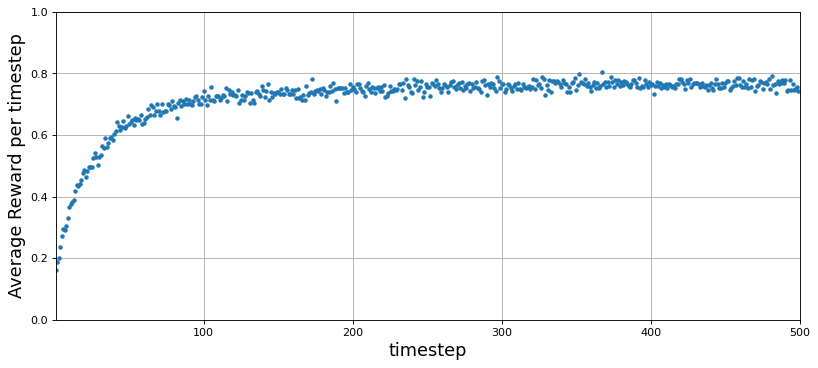

In [7]:
# Plot reward results

# over episodes
average_reward_per_timestep = total_rewards / max_episodes

fig, ax = plt.subplots(figsize=(12, 5), dpi = 80)
plt.grid()
ax.plot(average_reward_per_timestep, '.')
ax.set_xlabel("timestep", fontsize=16)
ax.set_ylabel("Average Reward per timestep", fontsize=16)
ax.set_ylim([0,1])
ax.set_xlim([1, steps_per_episode])

(0.0, 100.0)

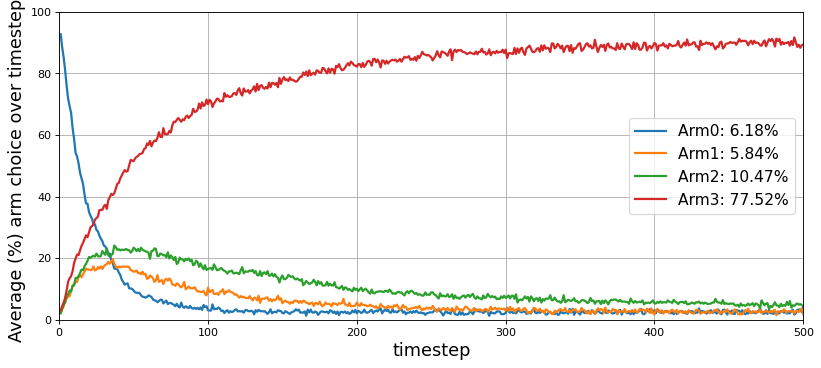

In [8]:
# Plot action results

fig, ax = plt.subplots(figsize=(12, 5), dpi = 80)
plt.grid()
for i in range(num_arms):
  # average (across episodes) percentage of a particular arm pull (over all timesteps)
  arm_pull_average = 100 * total_actions[:,i] / max_episodes
  steps = list(np.array(range(steps_per_episode))+1)
  ax.plot(steps, arm_pull_average, '-', linewidth = 2, label =f"Arm{i}: {round(np.mean(arm_pull_average),2)}%")

ax.legend(fontsize=14)
ax.set_xlabel("timestep", fontsize=16)
ax.set_ylabel("Average (%) arm choice over timesteps", fontsize=16)
ax.set_xlim([0, steps_per_episode])
ax.set_ylim([0, 100])

In [9]:
np.mean(arm_pull_average)

np.float64(77.5182)